In [60]:
# dissertation 

#basic python packages for pandas dataframes and numpy for calculations 
import pandas as pd
import numpy as np
%matplotlib inline

#for natural language preprocessing 
import nltk
import string 
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

#for sentiment analysis 
import textblob 
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#for data visualisation 
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# for social network analysis 
import networkx as nx 
import itertools
from itertools import combinations as comb




In [3]:
#loading the csv files 
df1 = pd.read_csv("coded_csa_tweets.csv")

df2 = pd.read_csv("CSA_tweets_sample_500[1270].csv")
#reading csv files - df stands for dataframe 

df2['description'] = df2.description.astype(str)


In [4]:
#forming new dataframes 
df = pd.DataFrame(df1[['screen_name', 'mentions_screen_name', 'text', 'created_at', 'screen_name_bio']])

data = pd.DataFrame(df2[['user_id', 'status_id', 'screen_name', 'text', 'hashtags', 'symbols', 'retweet_status_id', 'retweet_text',
      'place_name', 'place_full_name', 'country', 'country_code', 'geo_coords', 'coords_coords','bbox_coords', 'name', 'location', 'description', 'followers_count', 'friends_count','verified','date', 'current_time', 'reply_count']])




In [5]:
#data cleaning and processing 

#ensuring its a string
df['text_ed'] = df['text'].astype(str)

df['text_ed'][3]

"There's something particularly satisfying about planting onion sets. We've thousands to get in #volunteer #workday https://t.co/jIC4CVBEqH"

In [6]:
#remove Urls 
import re

df['text_ed'] = df['text_ed'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])


print(df['text'][26246])
print(df['text_ed'][26246])

Another @peoplesbiz supported @ssemidlands Fellow based in #Wolverhampton looking for support.
https://t.co/VYOnHl8rDn
Another @peoplesbiz supported @ssemidlands Fellow based in #Wolverhampton looking for support.



In [7]:
#removes @usernames from tweets text

def username(tweet):
    Tweet = re.sub('@[^\s]+','',tweet)
    return Tweet

df['text_ed'] = df['text_ed'].apply(username)

print(df['text'][26246])
print(df['text_ed'][26246])

Another @peoplesbiz supported @ssemidlands Fellow based in #Wolverhampton looking for support.
https://t.co/VYOnHl8rDn
Another  supported  Fellow based in #Wolverhampton looking for support.



In [8]:
#corrects spelling
#df.text_ed.apply(lambda txt: ''.join(textblob.TextBlob(txt).correct()))

#df['text_ed'][3]


In [9]:
#lowercase
df['text_ed'] = df['text_ed'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['text_ed'][3]


"there's something particularly satisfying about planting onion sets. we've thousands to get in #volunteer #workday"

In [10]:
punc = string.punctuation 
print(punc)

df['text_ed'] = df['text_ed'].apply(lambda x: " ".join(x for x in x.split() if x not in punc))

df['text_ed'][3]
df

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,screen_name,mentions_screen_name,text,created_at,screen_name_bio,text_ed
0,user_1,user_6,A wonderful guest blog post on the A Team's bl...,2019-03-25T11:20:20Z,Building the #community supported #agriculture...,a wonderful guest blog post on the a team's bl...
1,user_1,user_7,A wonderful guest blog post on the A Team's bl...,2019-03-25T11:20:20Z,Building the #community supported #agriculture...,a wonderful guest blog post on the a team's bl...
2,user_1,user_1,A wonderful guest blog post on the A Team's bl...,2019-03-25T11:20:20Z,Building the #community supported #agriculture...,a wonderful guest blog post on the a team's bl...
3,user_1,user_3,There's something particularly satisfying abou...,2019-03-25T07:46:59Z,Building the #community supported #agriculture...,there's something particularly satisfying abou...
4,user_1,user_8,"We want to pursue small on a large scale, supp...",2019-03-23T06:35:25Z,Building the #community supported #agriculture...,"we want to pursue small on a large scale, supp..."
...,...,...,...,...,...,...
26245,user_194,user_10412,It's Volunteers Week. #ThirdSectorTrends has n...,2020-06-04T15:42:41Z,The independent trust that supports community ...,it's volunteers week. #thirdsectortrends has n...
26246,user_194,user_10413,Another @peoplesbiz supported @ssemidlands Fel...,2020-06-04T15:42:36Z,The independent trust that supports community ...,another supported fellow based in #wolverhampt...
26247,user_194,user_194,Another @peoplesbiz supported @ssemidlands Fel...,2020-06-04T15:42:36Z,The independent trust that supports community ...,another supported fellow based in #wolverhampt...
26248,user_194,user_10413,@ssemidlands Fellows from our @peoplesbiz prog...,2020-06-04T15:42:32Z,The independent trust that supports community ...,fellows from our programme (fee cafe community...


In [11]:
#remove stopwords such as he/she/it
stop = stopwords.words('english')

print(stop)

df['text_ed'] = df['text_ed'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

df['text'][26246]
df['text_ed'][26246]


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

'another supported fellow based #wolverhampton looking support.'

In [12]:
#sentiment analysis on text_ed (cleaned)

analyser = SentimentIntensityAnalyzer()

def sentiment(x):
    score = analyser.polarity_scores(x)
    return score['compound']

df['polarity'] = df['text_ed'].apply(sentiment)
df


,screen_name,mentions_screen_name,text,created_at,screen_name_bio,text_ed,polarity
0,user_1,user_6,A wonderful guest blog post on the A Team's bl...,2019-03-25T11:20:20Z,Building the #community supported #agriculture...,wonderful guest blog post team's blog chair #c...,0.5719
1,user_1,user_7,A wonderful guest blog post on the A Team's bl...,2019-03-25T11:20:20Z,Building the #community supported #agriculture...,wonderful guest blog post team's blog chair #c...,0.5719
2,user_1,user_1,A wonderful guest blog post on the A Team's bl...,2019-03-25T11:20:20Z,Building the #community supported #agriculture...,wonderful guest blog post team's blog chair #c...,0.5719
3,user_1,user_3,There's something particularly satisfying abou...,2019-03-25T07:46:59Z,Building the #community supported #agriculture...,there's something particularly satisfying plan...,0.5095
4,user_1,user_8,"We want to pursue small on a large scale, supp...",2019-03-23T06:35:25Z,Building the #community supported #agriculture...,"want pursue small large scale, supporting coop...",0.7096
...,...,...,...,...,...,...,...
26245,user_194,user_10412,It's Volunteers Week. #ThirdSectorTrends has n...,2020-06-04T15:42:41Z,The independent trust that supports community ...,volunteers week. #thirdsectortrends new data v...,0.3400
26246,user_194,user_10413,Another @peoplesbiz supported @ssemidlands Fel...,2020-06-04T15:42:36Z,The independent trust that supports community ...,another supported fellow based #wolverhampton ...,0.6124
26247,user_194,user_194,Another @peoplesbiz supported @ssemidlands Fel...,2020-06-04T15:42:36Z,The independent trust that supports community ...,another supported fellow based #wolverhampton ...,0.6124
26248,user_194,user_10413,@ssemidlands Fellows from our @peoplesbiz prog...,2020-06-04T15:42:32Z,The independent trust that supports community ...,fellows programme (fee cafe community projects...,0.7650


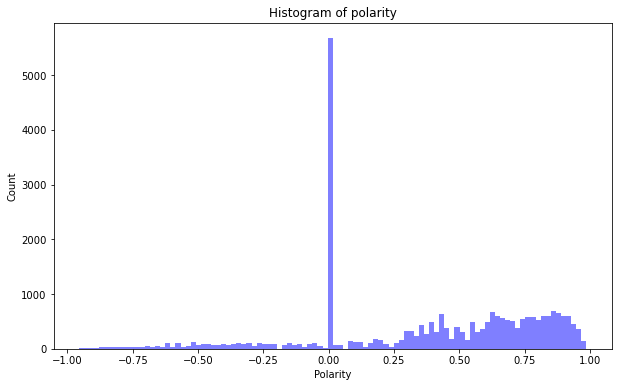

In [13]:

plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.polarity, 100, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

In [104]:
#exploratory data analysis 
data['screen_name'].loc[data['verified']== True].value_counts()
data['screen_name'].value_counts().head(40)

farmer = data[data['description'].str.contains('farm')]
farmer.screen_name.value_counts()

charity = data[data['description'].str.contains('charity')]
charity.screen_name.value_counts()

df['screen_name_bio'] = df['screen_name_bio'].astype(str)

farms = df[df['screen_name_bio'].str.contains('farm')]

charities = df[df['screen_name_bio'].str.contains('charity')]

In [ ]:
organic = df[df['text'].str.contains('organic')]

institution_mention = df[df['text'].str.contains('Soil Association','DEFRA')]

organicfarms = organic[organic['screen_name_bio'].str.contains('farm')]

institution_mention

In [ ]:

plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(organic.polarity, 100, facecolor='green', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of organic polarity')
plt.show();


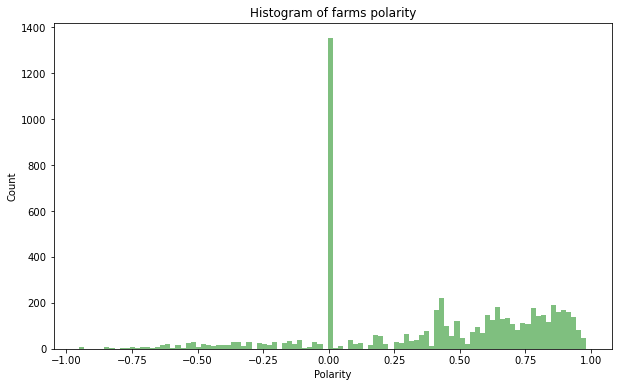

In [17]:

plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(farms.polarity, 100, facecolor='green', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of farms polarity')
plt.show();

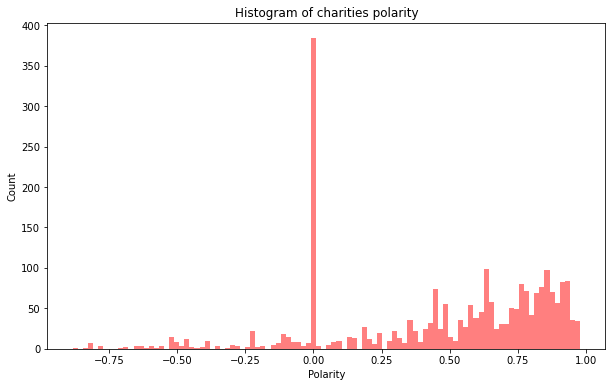

In [18]:
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(charities.polarity, 100, facecolor='red', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of charities polarity')
plt.show();


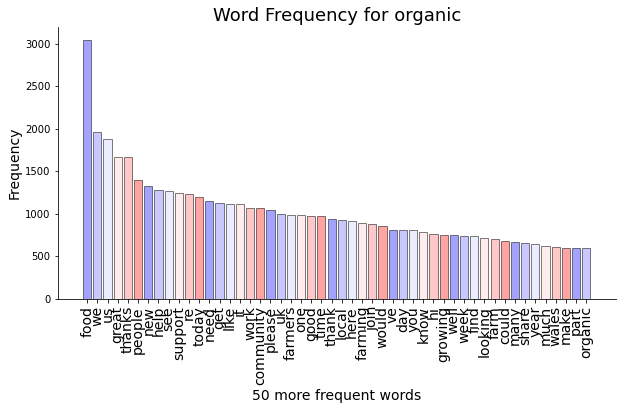

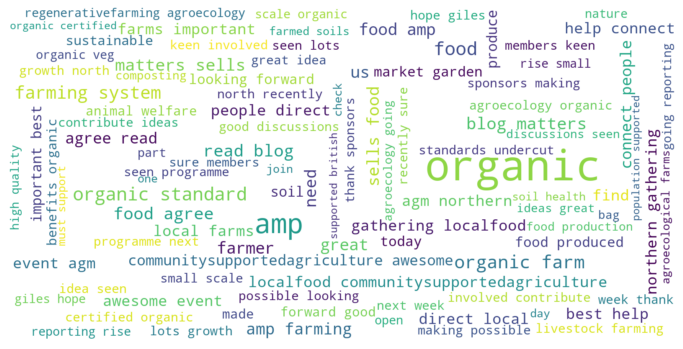

In [48]:
   #CountVectorizer will convert text to a matrix of token counts for each individual word, 
    #which can be used to calculate the frequencies for each word. 
    #the graph function will then form a graph of the most frequently used words within the tweet subset.

def vectorise(dataframe):
    vector = CountVectorizer()
    frequency_matrix = vector.fit_transform(df.text_ed)
    sum_frequencies = np.sum(frequency_matrix, axis=0)
    #squeeze removes single-dimensional entries from the shape of an array from applying np.asarray to the sum of frequencies.
    frequency = np.squeeze(np.asarray(sum_frequencies))
    # transform the frequencies for each word into a new dataframe
    frequency_df = pd.DataFrame([frequency], columns=vector.get_feature_names()).transpose()
    return frequency_df

def graph(word_frequency, sent):
    plt.figure(figsize=(10,5))
    plt.bar(np.arange(50), word_frequency[0][1:51], width = 0.8, color = sns.color_palette("bwr"), alpha=0.5, 
            edgecolor = "black", capsize=8, linewidth=1);
    plt.xticks(np.arange(50), labels, rotation=90, size=14);
    labels = word_frequency[0][1:51].index
    plt.xlabel("50 more frequent words", size=14);
    plt.ylabel("Frequency", size=14);
    title = "Word Frequency for %s" %sent
    plt.title(title, size=18)
    plt.grid(False);
    plt.gca().spines["top"].set_visible(False);
    plt.gca().spines["right"].set_visible(False);
    plt.show()
    
word_frequency = vectorise(organic).sort_values(0, ascending = False)
graph(word_frequency, 'organic')


organic_string = pd.Series([t for t in organic.text_ed]).str.cat(sep=' ')
wordcloud(organic_string)

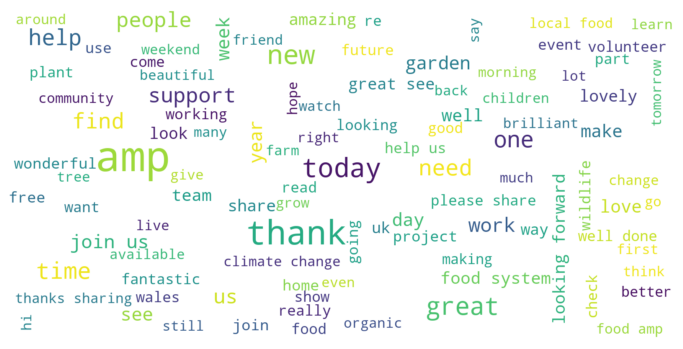

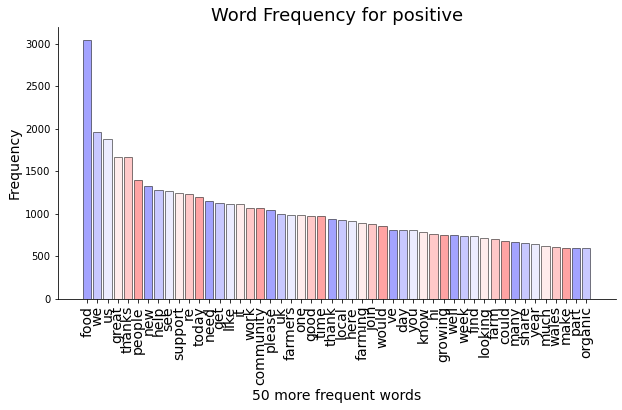

In [46]:
#generate wordcloud visualisation for positive tweets (polarity greater than 0)

pos_tweets = df[df.polarity > 0]
pos_string = []
for t in pos_tweets.text_ed:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

def wordcloud(series):
    wordcloud = WordCloud(width=1600, height=800,max_font_size=100, max_words=100, background_color='white').generate(series)
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

wordcloud(pos_string)

#tokenisised word frequency graph 
word_frequency = vectorise(pos_tweets).sort_values(0, ascending = False)
graph(word_frequency, 'positive')

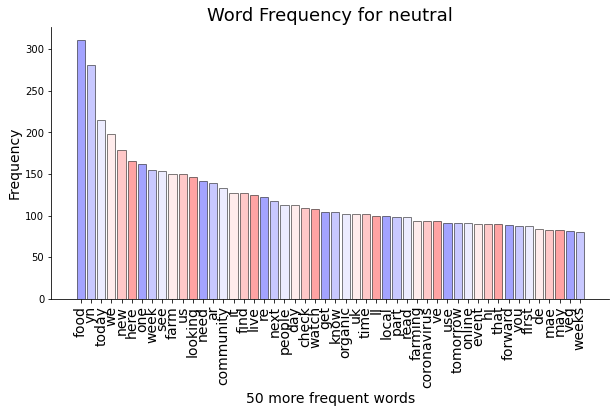

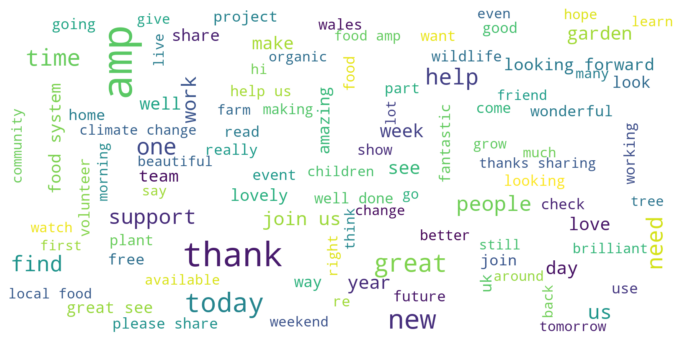

In [43]:
neutral_tweets = df[df.polarity == 0]
neutral_string = []
for t in neutral_tweets.text_ed:
    neutral_string.append(t)
neutral_string = pd.Series(pos_string).str.cat(sep=' ')

word_frequency = vectorise(neutral_tweets).sort_values(0, ascending = False)
graph(word_frequency, 'neutral')

wordcloud(neutral_string)

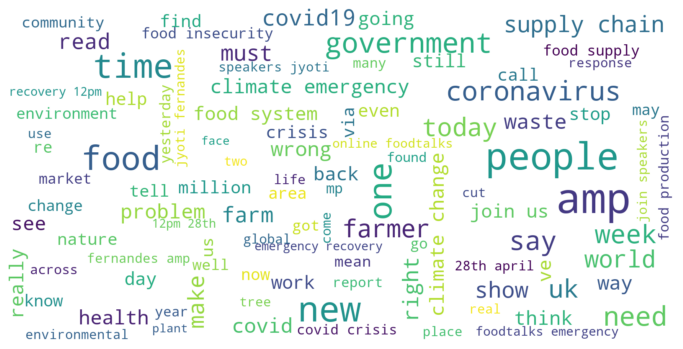

In [41]:
#if tweets is negative (polarity less than 0)  form new panda series. 

neg_tweets = df[df.polarity < 0]
neg_string = []
for t in neg_tweets.text_ed:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

word_frequency = vectorise(neg_tweets).sort_values(0, ascending = False)
graph(word_frequency, 'negative')

wordcloud(neg_string)

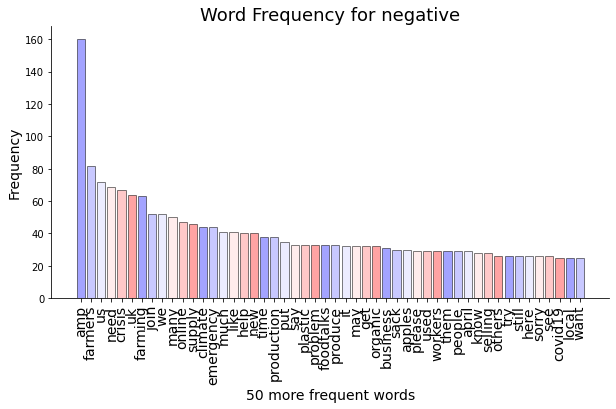

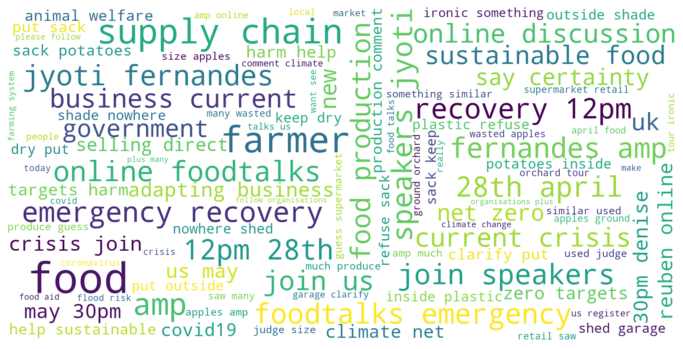

In [42]:
neg_tweets = farms[farms.polarity < 0]
neg_string = []
for t in neg_tweets.text_ed:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

word_frequency = vectorise(neg_tweets).sort_values(0, ascending = False)
graph(word_frequency, 'negative')

wordcloud(neg_string)


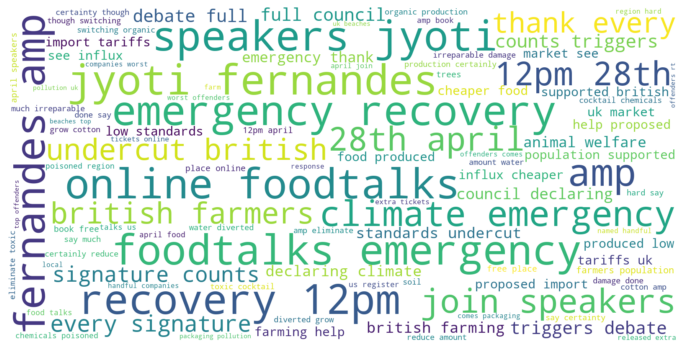

In [72]:
neg_tweets = charities[charities.polarity < 0]
neg_string = []
for t in neg_tweets.text_ed:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=100, max_words=100, background_color='white').generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [23]:
#network analysis
edgelist = pd.DataFrame(df[['screen_name', 'mentions_screen_name','polarity']])
edgelist

,screen_name,mentions_screen_name,polarity
0,user_1,user_6,0.5719
1,user_1,user_7,0.5719
2,user_1,user_1,0.5719
3,user_1,user_3,0.5095
4,user_1,user_8,0.7096
...,...,...,...
26245,user_194,user_10412,0.3400
26246,user_194,user_10413,0.6124
26247,user_194,user_194,0.6124
26248,user_194,user_10413,0.7650


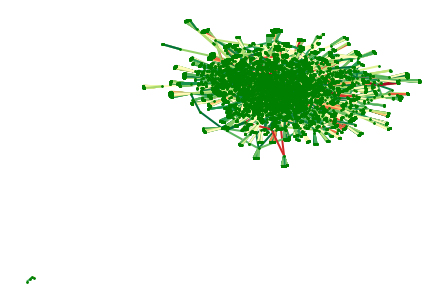

In [101]:
#drawing the network graph of whole dataframe, by sentiment polarity
G = nx.MultiDiGraph()
G = nx.from_pandas_edgelist(edgelist, source='screen_name', target='mentions_screen_name', edge_attr='polarity')

#colour graph edges by polarity attribute
colors = nx.get_edge_attributes(G,'polarity').values()
nx.draw(G, node_color='green', edge_color=colors, node_size=3, width=2, edge_cmap=plt.cm.RdYlGn)

plt.show()

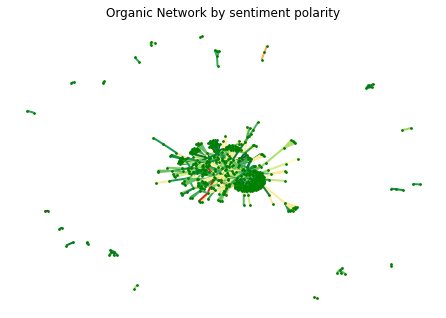

<Figure size 1800x1800 with 0 Axes>

In [96]:
#first convert organic network to edgelist format
organic_network = pd.DataFrame(organic[['screen_name','mentions_screen_name','polarity']])

#form organic network directed graph by polarity
G = nx.MultiDiGraph()
G = nx.from_pandas_edgelist(organic_network, source='screen_name', target='mentions_screen_name', edge_attr='polarity')

#color edges by the sentiment polarity attribute
colors = nx.get_edge_attributes(G,'polarity').values()
nx.draw(G, node_color='pink', edge_color=colors, node_size=3, width=2, edge_cmap=plt.cm.RdYlGn, with_labels=False)
plt.title('Organic Network by sentiment polarity')
plt.figure(figsize=[25,25])
plt.show()

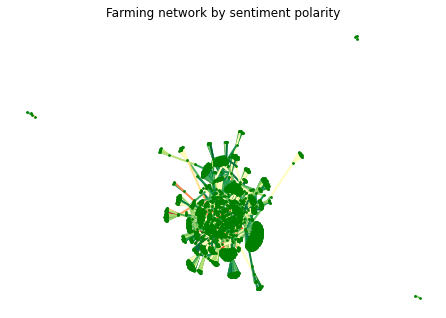

<Figure size 360x504 with 0 Axes>

In [102]:
farm_network = pd.DataFrame(farms[['screen_name','mentions_screen_name','polarity']])
#farm_network
G = nx.MultiDiGraph()
G = nx.from_pandas_edgelist(farm_network, source='screen_name', target= 'mentions_screen_name', edge_attr='polarity')

colors = nx.get_edge_attributes(G,'polarity').values()
nx.draw(G, node_color='green', edge_color=colors, node_size=3, width=2, edge_cmap=plt.cm.RdYlGn)

plt.title('Farming network by sentiment polarity')
plt.figure(figsize=[5,7])
plt.show()

In [ ]:
nx.isconnected(G)

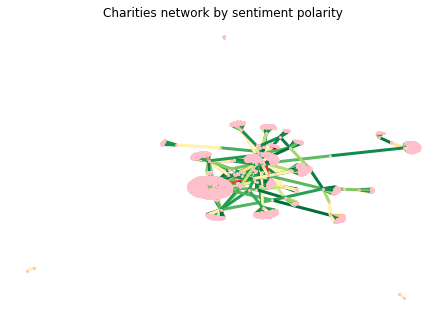

<Figure size 1440x1440 with 0 Axes>

DegreeView({'user_18': 53, 'user_671': 1, 'user_672': 1, 'user_556': 2, 'user_673': 1, 'user_674': 1, 'user_675': 1, 'user_676': 1, 'user_19': 530, 'user_38': 1, 'user_46': 4, 'user_7': 1, 'user_677': 1, 'user_678': 1, 'user_679': 1, 'user_680': 1, 'user_681': 1, 'user_682': 1, 'user_683': 1, 'user_684': 1, 'user_71': 1, 'user_685': 1, 'user_686': 1, 'user_687': 1, 'user_688': 1, 'user_689': 1, 'user_690': 1, 'user_691': 1, 'user_692': 2, 'user_588': 1, 'user_693': 1, 'user_694': 1, 'user_695': 1, 'user_696': 1, 'user_697': 1, 'user_698': 1, 'user_642': 1, 'user_699': 1, 'user_700': 1, 'user_860': 1, 'user_861': 1, 'user_862': 1, 'user_375': 2, 'user_863': 1, 'user_143': 2, 'user_913': 1, 'user_1056': 1, 'user_1057': 1, 'user_645': 3, 'user_1058': 1, 'user_1127': 1, 'user_1128': 1, 'user_170': 2, 'user_1201': 1, 'user_1202': 1, 'user_1203': 1, 'user_85': 69, 'user_1215': 1, 'user_1216': 1, 'user_1217': 1, 'user_1218': 1, 'user_195': 2, 'user_88': 3, 'user_1439': 1, 'user_630': 1, 'user

In [98]:
charities_network = pd.DataFrame(charities[['screen_name','mentions_screen_name','polarity']])

G = nx.from_pandas_edgelist(charities_network, source='screen_name', target= 'mentions_screen_name', edge_attr='polarity')

colors = nx.get_edge_attributes(G,'polarity').values()
nx.draw(G, node_color='green', edge_color=colors, node_size=3, width=2, edge_cmap=plt.cm.RdYlGn)
plt.title('Charities network by sentiment polarity')
plt.figure(figsize=[20,20])
plt.show()

